In [2]:
import nilearn
import nistats

In [3]:
subj_idx = '01'

In [4]:
import os

In [12]:
path = os.path.join(os.environ['HOME'], 'data/openfmri/ds008/derivatives/fmriprep/sub-{subj_idx}/func/sub-{subj_idx}_task-stopsignal'.format(**locals()))

In [13]:
data = [path + '_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz',
        path + '_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz',
        path + '_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz']

mask = path + '_run-01_bold_space-MNI152NLin2009cAsym_brainmask.nii.gz'

confounds = [path+ '_run-01_bold_confounds.tsv',
             path + '_run-02_bold_confounds.tsv',
             path + '_run-03_bold_confounds.tsv']

In [14]:
# TR is 2 seconds
t_r = 2.0

In [18]:
from nistats.first_level_model import FirstLevelModel
first_level_model = FirstLevelModel(t_r, hrf_model='glover + derivative', smoothing_fwhm=8.0, mask=mask)

In [60]:
get_onsets(subj_idx, '03').trial_type.apply(lambda x: x.replace(' ', '_'))

03


0          failed_stop
1                   go
2                   go
3                   go
4                   go
5                   go
6      successful_stop
7                   go
8                   go
9                   go
10                  go
11         failed_stop
12                  go
13     successful_stop
14                  go
15                  go
16                  go
17                  go
18     successful_stop
19                  go
20                  go
21         failed_stop
22                  go
23                  go
24                  go
25     successful_stop
26                  go
27                  go
28         failed_stop
29                  go
            ...       
98         failed_stop
99                  go
100        failed_stop
101                 go
102                 go
103                 go
104                 go
105                 go
106                 go
107        failed_stop
108                 go
109                 go
110    succ

In [79]:
import pandas
import numpy as np

def get_onsets(subj_idx, run):
    
    path = os.environ['HOME'] + '/data/openfmri/ds008/'
    fn = path + 'sub-{subj_idx}/func/sub-{subj_idx}_task-stopsignal_run-{run}_events.tsv'.format(**locals())
    df = pandas.read_csv(fn, sep='\t', na_values=['n/a'])
    
    
        
    df = df[~df.duration.isnull()]
    
    df['trial_type'] = df.trial_type.apply(lambda x: x.replace(' ', '_'))

    return df
    

In [80]:
paradigm = [get_onsets(subj_idx, '01'), get_onsets(subj_idx, '02'), get_onsets(subj_idx, '03'), ]

In [81]:
first_level_model.fit(data, paradigm, confounds=confounds)

FirstLevelModel(drift_model='cosine', drift_order=1, fir_delays=[0],
        hrf_model='glover + derivative',
        mask='/Users/gilles/data/openfmri/ds008/derivatives/fmriprep/sub-01/func/sub-01_task-stopsignal_run-01_bold_space-MNI152NLin2009cAsym_brainmask.nii.gz',
        memory=Memory(cachedir=None), memory_level=1, min_onset=-24,
        minimize_memory=True, n_jobs=1, noise_model='ar1', period_cut=128,
        signal_scaling=True, slice_time_ref=0.0, smoothing_fwhm=8.0,
        standardize=False, subject_label=None, t_r=2.0, target_affine=None,
        target_shape=None, verbose=0)

In [100]:
zmap = first_level_model.compute_contrast('failed_stop - go')
# zmap = first_level_model.compute_contrast('go - failed_stop')

In [101]:
import nilearn
from nilearn import plotting
%matplotlib inline

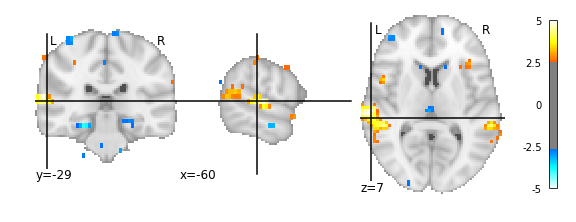

In [102]:
nilearn.plotting.plot_stat_map(zmap, threshold=2.6)

In [124]:
subjects.pop()

['01', '02', '03', '04', '05', '06', '07', '09', '10', '11', '13', '14', '15']

In [126]:
subj_idx

'11'

In [142]:
# problematic ids = [14]

Subject 01
Subject 02
Subject 03
Subject 04
Subject 05
Subject 06
Subject 07
Subject 09
Subject 10
Subject 11
Subject 12
Subject 13
Subject 14
Subject 15


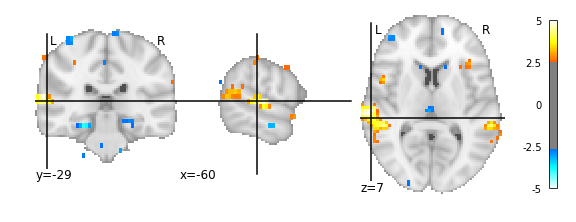

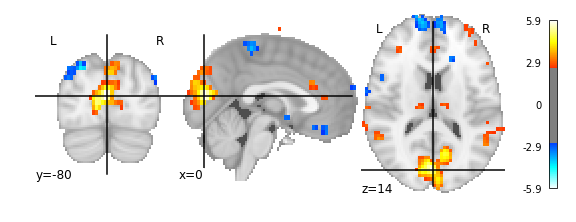

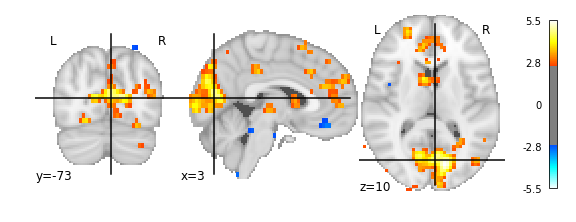

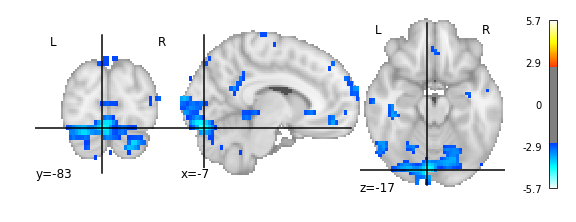

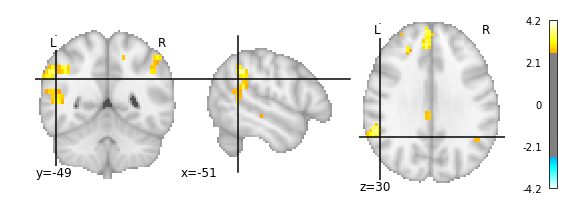

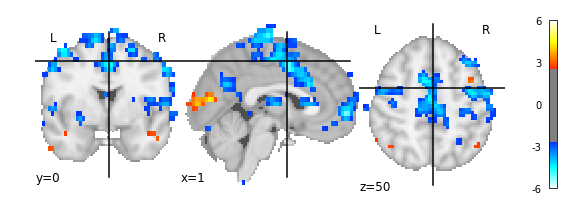

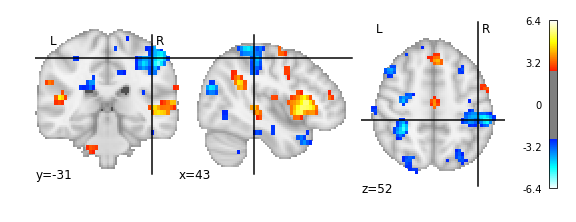

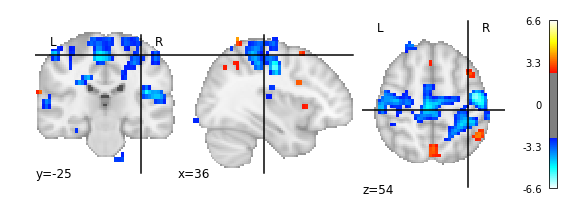

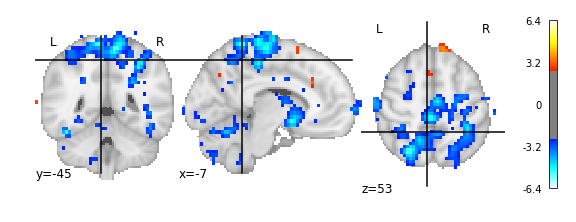

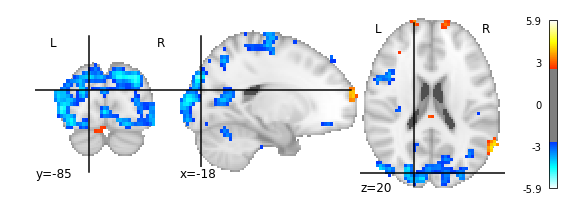

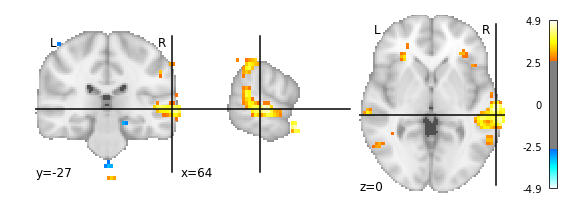

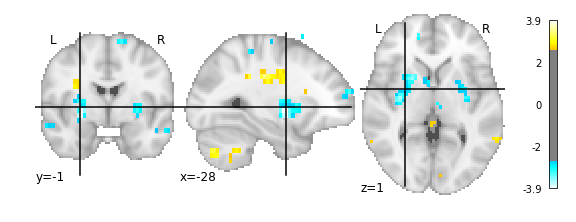

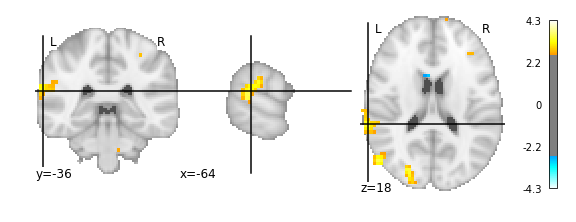

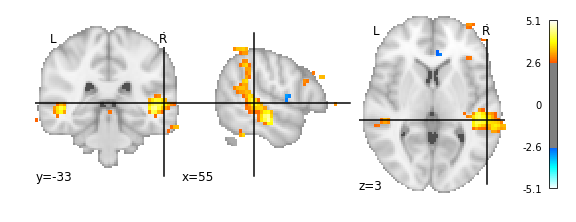

In [143]:
# Make an empty list to put fitted first level models in
models = []
subjects = ['%02d' % i for i in range(1, 16)]
subjects.pop(7)

for subj_idx in subjects[:]:

    print("Subject %s" % subj_idx)

    # set up path
    path = os.path.join(os.environ['HOME'], 'data/openfmri/ds008/derivatives/fmriprep/sub-{subj_idx}/func/sub-{subj_idx}_task-stopsignal'.format(**locals()))

    # Set up filenames
    data = [path + '_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz',
            path + '_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz',
            path + '_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz']
    
    confounds = [path+ '_run-01_bold_confounds.tsv',
             path + '_run-02_bold_confounds.tsv',
             path + '_run-03_bold_confounds.tsv']
    
    if subj_idx in ['11', '12']:
        data = data[:2]
        confounds = confounds[:2]
        paradigm = [get_onsets(subj_idx, '01'), get_onsets(subj_idx, '02')]                
    else:
        # Get paradigms
        paradigm = [get_onsets(subj_idx, '01'), get_onsets(subj_idx, '02'), get_onsets(subj_idx, '03')]


    mask = path + '_run-01_bold_space-MNI152NLin2009cAsym_brainmask.nii.gz'



    

    
    # Set up model, we have to give:
    # * the TR (time it takes to acquire one functional volume)
    # * The HRF-model (we use a standard double-gamma model + derivative)
    # * The amount of smoothing (we use ample, 8.0 mm)
    # * The mask (Saves time, we do not estimate models outside of the brain)
    first_level_model = FirstLevelModel(t_r, hrf_model='glover + derivative', smoothing_fwhm=8.0, mask=mask)
    
    # Fit model, including all confounds (motion parameters, tcompcorr, etc.)
    first_level_model.fit(data, paradigm, confounds=confounds,)
    
    # Compute contrast incongruent > congruent
    zmap = first_level_model.compute_contrast('failed_stop - go')
    
    # Plot resulting zmap, with (arbitrary but stringent) threshold at 2.6
    nilearn.plotting.plot_stat_map(zmap, threshold=2.6)

    
    # make list of models and subjects that we processed
    models.append(first_level_model)

In [173]:
contrasts = [model.compute_contrast('failed_stop - go') for model in models]

for i in range(len(contrasts)):
    
    if contrasts[i].shape != contrasts[0].shape:
        print i
        contrasts[i] = resample_to_img(contrasts[i], contrasts[0])
    
#     contrasts[i] = resample_to_img(contrasts[i], contrasts[0])
    
# contrasts.pop(8) 9
# contrasts.pop(8)
# contrasts.pop(8)
# contrasts.pop(9)
# contrasts.pop(9)
# len(contrasts)

8
9
10
12
13


In [174]:
from nilearn.image import resample_to_img

In [175]:
design_matrix = pandas.DataFrame({'intercept':np.ones(len(contrasts))},)

In [176]:
from nistats.second_level_model import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=0.0)
second_level_model = second_level_model.fit(contrasts, design_matrix=design_matrix)
z_map = second_level_model.compute_contrast('intercept')

In [179]:
from IPython.display import FileLink

/Users/gilles/Dropbox/notebooks_new/Summer school 2017/ds008/failed_go.nii.gz

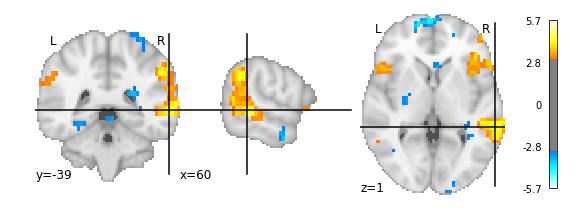

In [180]:
plotting.plot_stat_map(z_map, threshold=3.1 )

z_map.to_filename('failed_go.nii.gz')

FileLink('failed_go.nii.gz')

In [186]:
ssrts = pandas.read_csv('ssrts.csv')

In [192]:
design_matrix = pandas.DataFrame({'intercept':np.ones(len(contrasts))})
design_matrix['ssrt'] = ssrts['mean']
design_matrix['ssrt'] -= design_matrix['ssrt'].mean()

In [193]:
design_matrix

,intercept,ssrt
0,1.0,-7.428916
1,1.0,-6.468444
2,1.0,9.846535
3,1.0,-19.516318
4,1.0,8.969023
5,1.0,-4.218329
6,1.0,33.797542
7,1.0,16.315292
8,1.0,-27.414347
9,1.0,-1.158640


In [203]:
c

/Users/gilles/Dropbox/notebooks_new/Summer school 2017/ds008/failed_go.nii.gz

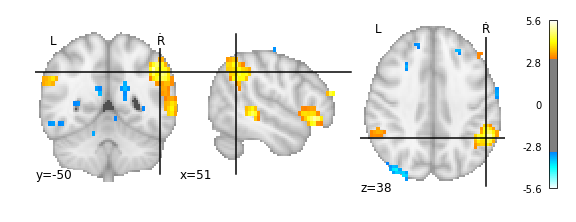

In [204]:
plotting.plot_stat_map(z_map, threshold=3.1 )
z_map.to_filename('failed_go.nii.gz')
FileLink('failed_go.nii.gz')

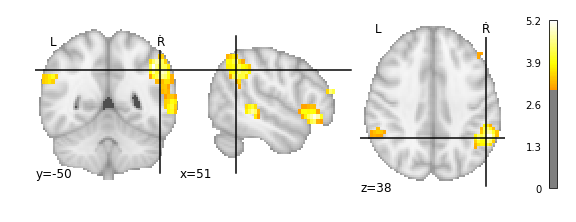

In [205]:
thresholded_map2, threshold2 = map_threshold(z_map, threshold=.05, height_control='fdr')
plotting.plot_stat_map(thresholded_map2, threshold=threshold2)

In [196]:
z_map = second_level_model.compute_contrast('ssrt')

/Users/gilles/Dropbox/notebooks_new/Summer school 2017/ds008/ssrt.nii.gz

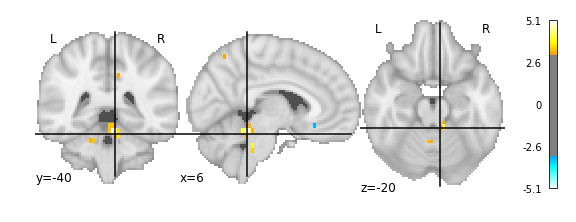

In [198]:
plotting.plot_stat_map(z_map, threshold=3.1)
z_map.to_filename('ssrt.nii.gz')
FileLink('ssrt.nii.gz')

In [199]:
from nistats.thresholding import map_threshold

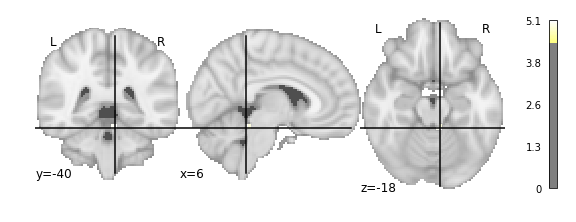

In [202]:
thresholded_map2, threshold2 = map_threshold(z_map, threshold=.05, height_control='fdr')
plotting.plot_stat_map(thresholded_map2, threshold=threshold2)

In [243]:
contrasts = [model.compute_contrast('successful_stop - failed_stop') for model in models]

for i in range(len(contrasts)):
    
    if contrasts[i].shape != contrasts[0].shape:
        print i
        contrasts[i] = resample_to_img(contrasts[i], contrasts[0])
    
#     contrasts[i] = resample_to_img(contrasts[i], contrasts[0])
    
# contrasts.pop(8) 9
# contrasts.pop(8)
# contrasts.pop(8)
# contrasts.pop(9)
# contrasts.pop(9)
# len(contrasts)

8
9
10
12
13


In [238]:
mu_go = pandas.read_csv('mu_go.csv')

In [239]:
design_matrix = pandas.DataFrame({'intercept':np.ones(len(contrasts))})
# design_matrix['mu_go'] = mu_go['mean']
# design_matrix['mu_go'] -= design_matrix['mu_go'].mean()

In [240]:
second_level_model = SecondLevelModel(smoothing_fwhm=0.0)
second_level_model = second_level_model.fit(contrasts, design_matrix=design_matrix)
z_map = second_level_model.compute_contrast('intercept')

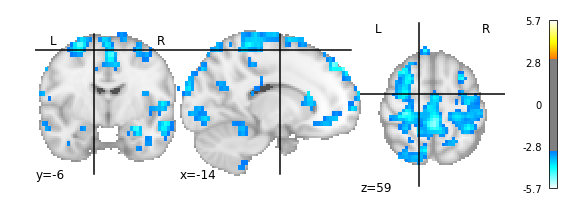

In [241]:
plotting.plot_stat_map(z_map, threshold=3.1)